In [173]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [174]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
transactions_df=pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv")

# 1.Transaction Data
### 1.1 Basic info about data
- Shape of data
- Data types



In [176]:
transactions_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [177]:
print("Transactions_data")
transactions_df.info()

Transactions_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [178]:
transactions_df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


### 1.2 Data Audit 
- duplicate checks
 -  2974905 duplicate records
- null value checks
 - No null values in data



In [179]:
transactions_df.duplicated().sum()

2974905

In [180]:
# Display duplicate rows
duplicate_rows = transactions_df[transactions_df.duplicated(keep=False)]

# Show the duplicate rows
duplicate_rows.head()

,t_dat,customer_id,article_id,price,sales_channel_id
14,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
15,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2
17,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
18,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,671505001,0.033881,2
19,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,631848002,0.033881,2


In [181]:
transactions_df.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

Drop duplicates

In [182]:
print(f"Number of rows before dropping duplicates: {transactions_df.shape[0]}")
# Drop duplicate rows, keeping the first occurrence
transactions_df = transactions_df.drop_duplicates()

# Check the shape of the DataFrame after dropping duplicates
print(f"Number of rows after dropping duplicates: {transactions_df.shape[0]}")

Number of rows before dropping duplicates: 31788324
Number of rows after dropping duplicates: 28813419


### 1.3 Categorical Distributions 

In [183]:
## Unique values in sales channel
transactions_df['sales_channel_id'].unique()

array([2, 1])

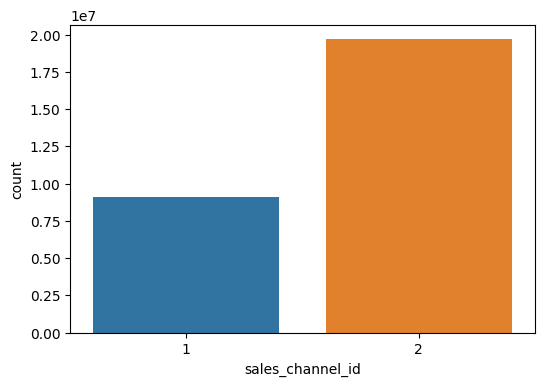

In [184]:
## distribution of sales_channel_id
plt.figure(figsize=(6, 4))
sns.countplot(x='sales_channel_id', data=transactions_df)
plt.show()

In [185]:
## Date -  range of date
print(f"Minimum Date in transation data {transactions_df.t_dat.min()}")
print(f"Max Date in transation data {transactions_df.t_dat.max()}")

Minimum Date in transation data 2018-09-20
Max Date in transation data 2020-09-22


In [186]:
## is it daily data?
transactions_df.t_dat.unique()[:10],transactions_df.t_dat.nunique()

(array(['2018-09-20', '2018-09-21', '2018-09-22', '2018-09-23',
        '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
        '2018-09-28', '2018-09-29'], dtype=object),
 734)

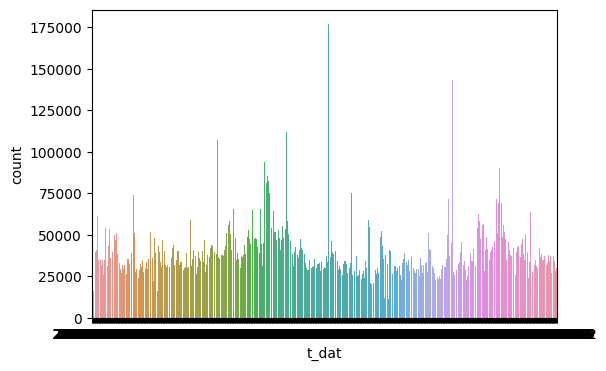

In [187]:
## is number of trasactions happens over time varies?
plt.figure(figsize=(6, 4))
sns.countplot(x='t_dat', data=transactions_df)
plt.show()

# 2 .Customer 
### 2.1 Basic meta data

In [188]:
customers_df =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/customers.csv")

In [189]:
print("Customer Data")
print(f"number of rows in Customers {customers_df.shape[0]}")
print(f"number of column in Customers {customers_df.shape[1]}")
print("Columns & Data Types")
print(customers_df.dtypes)

Customer Data
number of rows in Customers 1371980
number of column in Customers 7
Columns & Data Types
customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object


## 2.1 Customers Data Audit 
- identify the primary key 
- null value checks
- check for duplicates
- categorical distributions 
- numberical distributions

In [190]:
customer_id_colname='customer_id'
ACTIVE_COLUMN="Active"
FN_COLUMN="FN"
CLUB_MEM_STATUS_COLUMN="club_member_status"
AGE_COLUMN='age'
FSHN_NEWS_FREQ_COLUMN='fashion_news_frequency'
ZIP_COLUMN="postal_code"
AGE_GRP_COLUMN='age_group'

In [191]:
## Key of the table : intutively guessing and verifying customer id is the key of the table.
## lets verify that
customers_df.customer_id.nunique()== len(customers_df) 

True

In [192]:
#Does the customers data contains null values ?
customers_df.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

In [193]:
## percentage of null value in each column :
customers_df.isnull().mean() * 100

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.167000
age                        1.156066
postal_code                0.000000
dtype: float64

In [194]:
## duplicates 
customers_df.duplicated().sum()

0

In [195]:
##categorical distributions
## categorical columns
cat_column_names =[column for column in customers_df.columns if customers_df[column].dtype=='O' ]
print(cat_column_names )
## we can remove customer id as this the unique key

cat_column_names.remove(customer_id_colname)

['customer_id', 'club_member_status', 'fashion_news_frequency', 'postal_code']


club_member_status : Number of unique values - 3
Distinct values in club_member_status: ['ACTIVE' nan 'PRE-CREATE' 'LEFT CLUB']


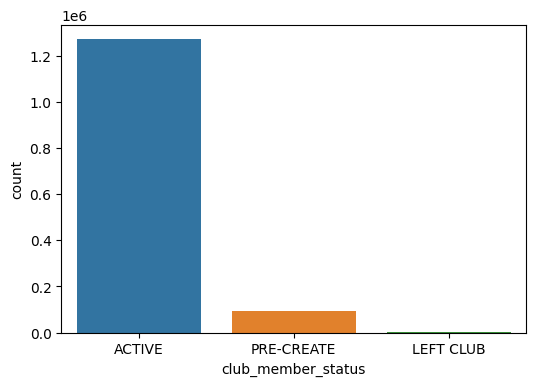

fashion_news_frequency : Number of unique values - 3
Distinct values in fashion_news_frequency: ['NONE' 'Regularly' nan 'Monthly']


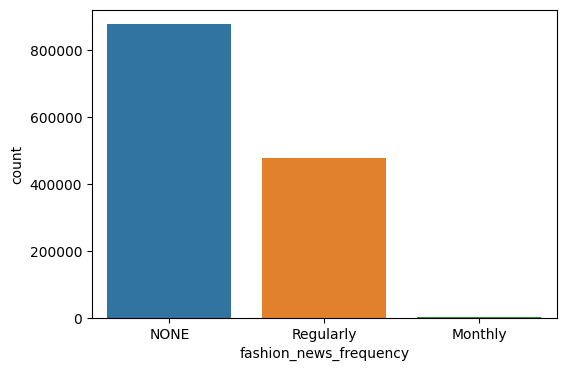

postal_code : Number of unique values - 352899


In [196]:
## let's check what are the distinct categories in each of the categorical fields 
### the distribution of data in each categories
for col in cat_column_names :
    print(f"{col} : Number of unique values - {customers_df[col].nunique()}")
    if customers_df[col].nunique() <10 : 
        print(f"Distinct values in {col}: {customers_df[col].unique()}")
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=customers_df)
        plt.show()
        

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


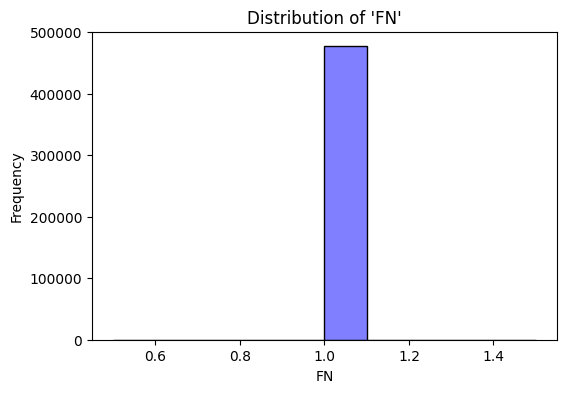

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


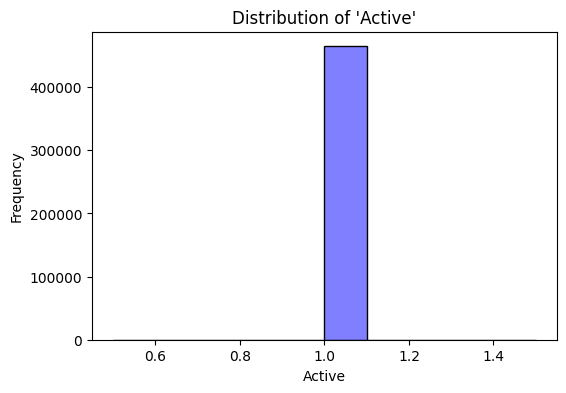

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


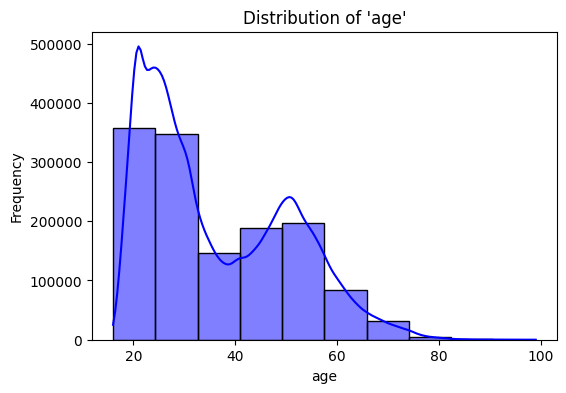

In [197]:
## Numerical columns , lets check the distribution of data
numerical_columns= [column for column in customers_df.select_dtypes(include=['float64', 'int64']).columns]

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(customers_df[column], kde=True, bins=10, color='blue')
    
    # Add title and labels
    plt.title(f"Distribution of '{column}'")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show plot
    plt.show()

In [198]:
customers_df[FN_COLUMN].unique(),customers_df[ACTIVE_COLUMN].unique()


(array([nan,  1.]), array([nan,  1.]))

In [199]:
## As its either one or none , we can make nan 0 , assuming all the  missing ones are not active ones
customers_df[FN_COLUMN]=customers_df[FN_COLUMN].fillna(0)
customers_df[ACTIVE_COLUMN]=customers_df[ACTIVE_COLUMN].fillna(0)

In [200]:
def bivariant_frquency(df,COLUMN,HUE):
    # Group the data by FN_COLUMN and ACTIVE_COLUMN to get counts
    category_counts =df.groupby([COLUMN, HUE]).size().reset_index(name='count')

    # Plot the barplot
    sns.barplot(data=category_counts, x=COLUMN, y='count', hue=HUE)

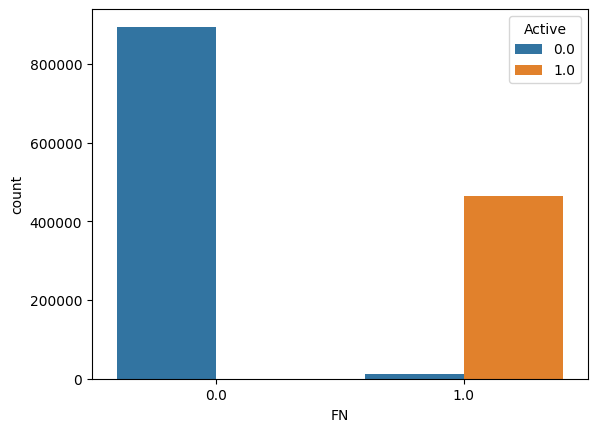

In [201]:
bivariant_frquency(df=customers_df,COLUMN=FN_COLUMN,HUE=ACTIVE_COLUMN)

when active is zero, FN is also zero meaning those two are highly correlated and we can drop one

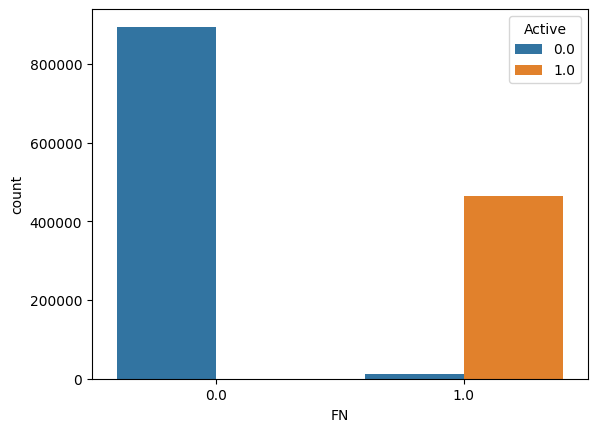

In [202]:
bivariant_frquency(df=customers_df,COLUMN=FN_COLUMN,HUE=ACTIVE_COLUMN)

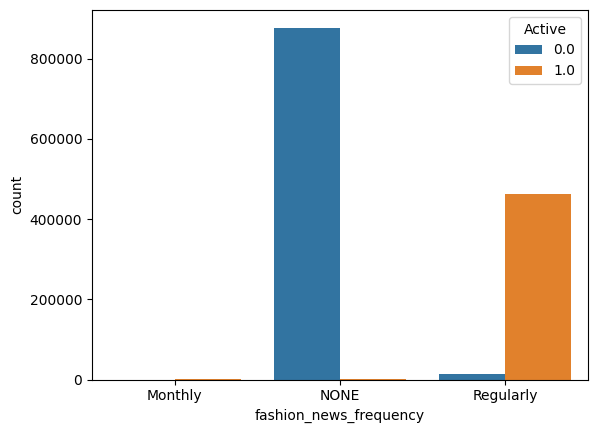

In [203]:
bivariant_frquency(df=customers_df,COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=ACTIVE_COLUMN)

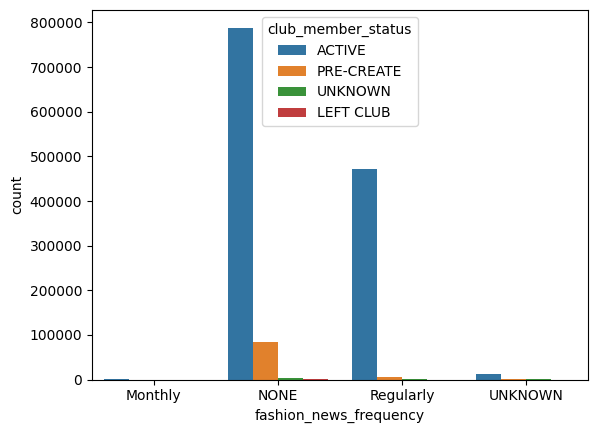

In [204]:
#lets fill the missing values in club and fashion news frequency with unknown 
customers_df[CLUB_MEM_STATUS_COLUMN]=customers_df[CLUB_MEM_STATUS_COLUMN].fillna("UNKNOWN")
customers_df[FSHN_NEWS_FREQ_COLUMN]=customers_df[FSHN_NEWS_FREQ_COLUMN].fillna("UNKNOWN")
bivariant_frquency(df=customers_df,COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=CLUB_MEM_STATUS_COLUMN)


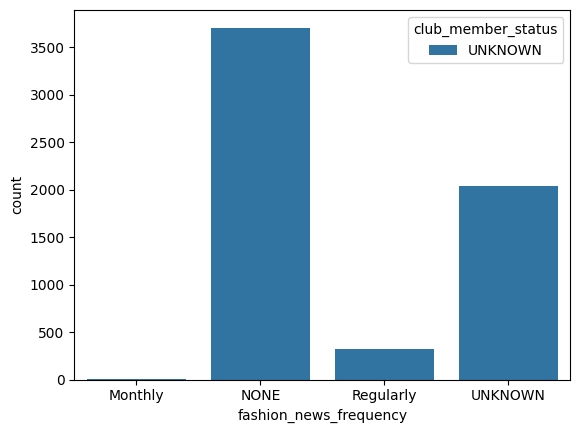

In [205]:
bivariant_frquency(df=customers_df[customers_df[CLUB_MEM_STATUS_COLUMN]=="UNKNOWN"],COLUMN=FSHN_NEWS_FREQ_COLUMN,HUE=CLUB_MEM_STATUS_COLUMN)

In [206]:
## Age Analysis
customers_df["age"].min(),customers_df["age"].max()

(16.0, 99.0)

Lets make age as a catogory. This with the assumption that all teens will be  instersted in similar items , all people age between 25-35 has similar intersts and so on
So the categories which we gonna consider will be:
- 0-12  if any
- 13- 25 
- 25 -35
- 35- 55
- 55 - 100

In [207]:
bins = [ 13, 25, 35, 55, 100]
labels = ['13-25', '25-35', '35-55', '55-100']
customers_df[AGE_COLUMN] = pd.cut(customers_df[AGE_COLUMN], bins=bins, labels=labels, right=False)

In [208]:
## fill nan with unknown
customers_df[AGE_COLUMN]=customers_df[AGE_COLUMN].astype(str)
customers_df[AGE_COLUMN]=customers_df[AGE_COLUMN].fillna("UNKNOWN")

In [209]:
customers_df.isnull().mean() * 100

customer_id               0.0
FN                        0.0
Active                    0.0
club_member_status        0.0
fashion_news_frequency    0.0
age                       0.0
postal_code               0.0
dtype: float64

In [210]:
### Drop column postal code
customers_df=customers_df.drop(columns=[ZIP_COLUMN])

In [211]:
## One hot encoding
customers_df = pd.get_dummies(customers_df, columns=[CLUB_MEM_STATUS_COLUMN,FSHN_NEWS_FREQ_COLUMN,AGE_COLUMN], drop_first=True)

In [212]:
customers_df.head()

,customer_id,FN,Active,club_member_status_LEFT CLUB,club_member_status_PRE-CREATE,club_member_status_UNKNOWN,fashion_news_frequency_NONE,fashion_news_frequency_Regularly,fashion_news_frequency_UNKNOWN,age_25-35,age_35-55,age_55-100,age_nan
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,False,False,False,True,False,False,False,True,False,False
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,False,False,False,True,False,False,True,False,False,False
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,False,False,False,True,False,False,False,False,False,False
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,False,False,False,True,False,False,False,True,False,False
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,False,False,False,False,True,False,False,True,False,False


In [213]:
customers_df.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status_LEFT CLUB',
       'club_member_status_PRE-CREATE', 'club_member_status_UNKNOWN',
       'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly',
       'fashion_news_frequency_UNKNOWN', 'age_25-35', 'age_35-55',
       'age_55-100', 'age_nan'],
      dtype='object')

In [214]:
selected_columns=[  'FN', 'Active', 'club_member_status_LEFT CLUB',
       'club_member_status_PRE-CREATE', 'club_member_status_UNKNOWN',
       'fashion_news_frequency_NONE', 'fashion_news_frequency_Regularly',
       'fashion_news_frequency_UNKNOWN', 'age_25-35', 'age_35-55',
       'age_55-100', 'age_nan']

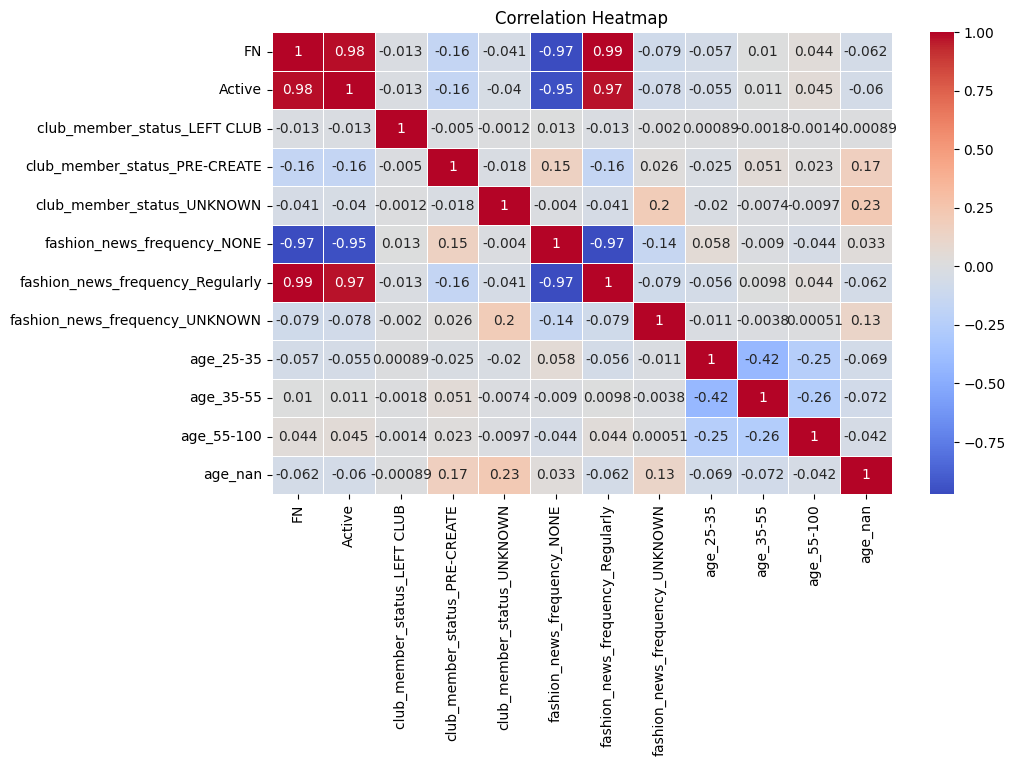

In [215]:
correlation_matrix = customers_df[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

In [216]:
#columns FN and active are highly correlated , so lets drop one
customers_df=customers_df.drop(columns=[FN_COLUMN])

## Conclusions Customer:
Transformation required:
- fill nan in active with zero assuming they are not active
- fill nan in club member stsus with  NOT_A_MEMBER
- fill nan in 	fashion_news_frequency with NONE
- drop FN because its highly correlated to active
- catogorize age 
- drop postal_code

### 3. Articles Dataset

In [217]:
articles =pd.read_csv("/kaggle/input/h-and-m-personalized-fashion-recommendations/articles.csv")

In [218]:
print("Articles Data")
print(f"number of rows in articles dataframe {articles.shape[0]}")
print(f"number of column in articles dataframe {articles.shape[1]}")
print("Columns & Data Types")
print(articles.dtypes)

Articles Data
number of rows in articles dataframe 105542
number of column in articles dataframe 25
Columns & Data Types
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no     

## 3.2 Customers Data Audit 
- identify the key 
- null value checks
- check for duplicates
- categorical distributions 
- numberical distributions

In [219]:
ARTICLE_ID='article_id'  
PRODUCT_CODE='product_code'
PRODUCT_NAME= 'prod_name'
PRODUCT_TYPE_NO='product_type_no'
PRODUCT_GRP_NAME='product_group_name'

In [220]:
## Asumming ariticle id is the key , lets verifiy that
len(articles[ARTICLE_ID])==articles.shape[0],articles.shape

(True, (105542, 25))

In [221]:
#Does the customers data contains null values ?
articles.isnull().sum()/len(articles)*100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

.39% of Detailed Description data is missing. This is a very small portion of the data, ethier we can jut drop those rows aor we can just use "UNKNOWN" to replace nulls or  investigate which pics whic agre the one missing

In [222]:
## does it contain duplicates
transactions_df.duplicated().sum()

0

In [223]:
## number of unique values in each column
for column in articles.columns:
    print(f"{column}: {articles[column].nunique()}")

article_id: 105542
product_code: 47224
prod_name: 45875
product_type_no: 132
product_type_name: 131
product_group_name: 19
graphical_appearance_no: 30
graphical_appearance_name: 30
colour_group_code: 50
colour_group_name: 50
perceived_colour_value_id: 8
perceived_colour_value_name: 8
perceived_colour_master_id: 20
perceived_colour_master_name: 20
department_no: 299
department_name: 250
index_code: 10
index_name: 10
index_group_no: 5
index_group_name: 5
section_no: 57
section_name: 56
garment_group_no: 21
garment_group_name: 21
detail_desc: 43404


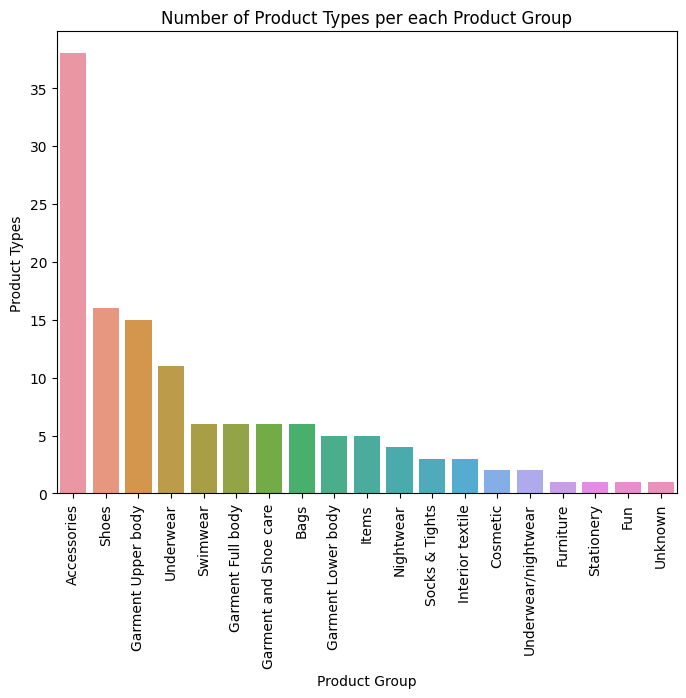

In [225]:
articles_product_grp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
plot_df = pd.DataFrame({'Product Group': articles_product_grp.index,
                   'Product Types': articles_product_grp.values
                  })
plot_df = plot_df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=plot_df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

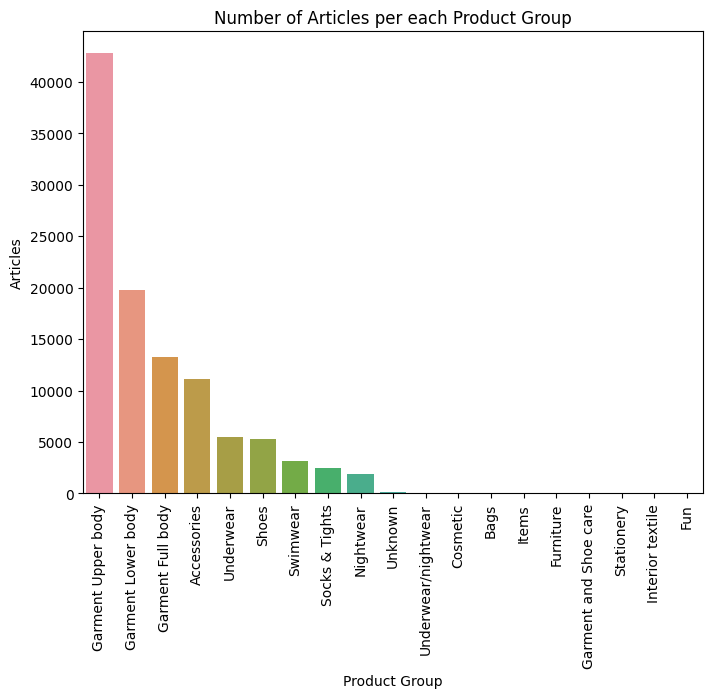

In [226]:
articles_product_grp= articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': articles_product_grp.index,
                   'Articles': articles_product_grp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()